# Atelier 4 : Apprentissage supervisé (Classification avec Arbre de décision et foret aleatoire)
Réaliser par :chaimaa bouabd 

In [172]:
# Importation des outils nécessaire
import numpy as np
from sklearn.datasets import load_iris # Importation des données
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.model_selection import cross_val_score, validation_curve # Pour la validation croisée
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

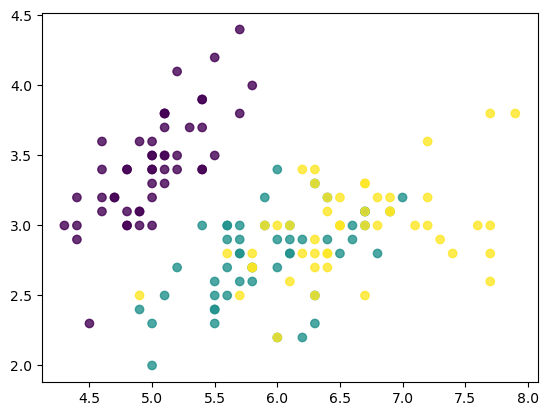

In [173]:
data = load_iris()
X = data.data
y = data.target
plt.scatter(X[:,0],X[:,1],c=y,alpha=0.8)

## 1-  Entraîner les deux modèles (Arbre de decision et foret aleatoire) sur la base des iris de Fisher en utilisant les deux stratégies d’apprentissage (traditionnel et validation croisée)

## 1 - Arbre de decision

In [174]:
# Entraînement du model Arbre de decision
clf = DecisionTreeClassifier()

train  (112, 4)
test :  (38, 4)
prediction d'algo Decision Tree
[2 1 2 0 1 1 2 0 1 2 0 2 1 0 0 2 2 0 2 2 1 2 0 0 2 2 0 1 0 1 0 2 1 1 2 1 2
 2]
[1 2 2 0 1 1 2 0 1 2 0 2 1 0 0 2 2 0 2 2 1 2 0 0 2 2 0 1 0 1 0 2 1 1 2 1 2
 2]
train score 1.0
test score 0.9473684210526315


[Text(0.3, 0.9285714285714286, 'x[2] <= 2.45\ngini = 0.665\nsamples = 112\nvalue = [39, 39, 34]'),
 Text(0.2, 0.7857142857142857, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.4, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.498\nsamples = 73\nvalue = [0, 39, 34]'),
 Text(0.3, 0.6428571428571429, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(0.5, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.188\nsamples = 38\nvalue = [0, 4, 34]'),
 Text(0.2, 0.5, 'x[1] <= 2.65\ngini = 0.49\nsamples = 7\nvalue = [0, 3, 4]'),
 Text(0.1, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.3, 0.35714285714285715, 'x[2] <= 5.05\ngini = 0.48\nsamples = 5\nvalue = [0, 3, 2]'),
 Text(0.2, 0.21428571428571427, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.4, 0.21428571428571427, 'x[0] <= 6.15\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.3, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.5, 0.07142857142857142, 'gini = 0.0\

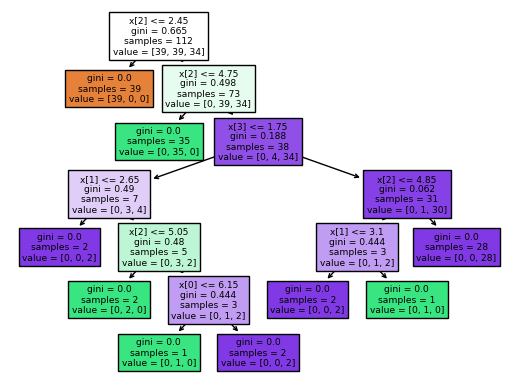

In [175]:
# la stratégie d'apprentissage traditionnelle 75 pour E et 25 pour le test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print("train ",X_train.shape)
print("test : ",X_test.shape)
clf.fit(X_train, y_train)
print("prediction d'algo Decision Tree")
clf_pred = clf.predict(X_test)
print(clf_pred)
print(y_test)
print("train score", clf.score(X_train, y_train))
print("test score", clf.score(X_test, y_test))
#visualiser l’arbre
from sklearn import tree
tree.plot_tree(clf, filled=True)

In [176]:
#Avec la method de validation croisée
scores = cross_val_score(DecisionTreeClassifier(random_state=0),X_train,y_train,cv=5)
#Affichage des résultats
print ("Le score obtenu pour chacun des 5 fold créé est : ",scores)
print ("Cela fait une moyenne de : ",scores.mean())
print ("Et un écart-type de  : ",scores.std())

Le score obtenu pour chacun des 5 fold créé est :  [0.95652174 0.95652174 0.95454545 0.90909091 0.86363636]
Cela fait une moyenne de :  0.9280632411067193
Et un écart-type de  :  0.03696444716438954


In [177]:
# Faire des prédictions sur les données de test en utilisant la méthode de validation croisée
clf_pred_vc = cross_val_predict(DecisionTreeClassifier(random_state=0), X_test, y_test, cv=10)

print("Y_predit:", clf_pred_vc)
print("Y_test : ", y_test)


Y_predit: [1 2 2 0 1 1 2 0 1 2 0 2 1 0 0 2 2 0 2 2 1 2 0 0 2 2 0 1 0 1 0 2 1 1 2 1 2
 2]
Y_test :  [1 2 2 0 1 1 2 0 1 2 0 2 1 0 0 2 2 0 2 2 1 2 0 0 2 2 0 1 0 1 0 2 1 1 2 1 2
 2]


## 2 - foret aleatoire

In [178]:
rfc = RandomForestClassifier()# max_depth=2, random_state=0
rfc.fit(X_train, y_train)
print("train score",rfc.score(X_train, y_train))
print("test score", rfc.score(X_test, y_test))
rfc_pred = rfc.predict(X_test)
print("y_predit",rfc_pred)
print("Y_test :", y_test)
accuracy = rfc.score(X_test,y_test)
print("Accuracy Forêt aléatoire : "+ str(accuracy))

train score 1.0
test score 0.9473684210526315
y_predit [2 1 2 0 1 1 2 0 1 2 0 2 1 0 0 2 2 0 2 2 1 2 0 0 2 2 0 1 0 1 0 2 1 1 2 1 2
 2]
Y_test : [1 2 2 0 1 1 2 0 1 2 0 2 1 0 0 2 2 0 2 2 1 2 0 0 2 2 0 1 0 1 0 2 1 1 2 1 2
 2]
Accuracy Forêt aléatoire : 0.9473684210526315


In [179]:
#Avec la method de validation croisée
scores = cross_val_score(rfc,X_train,y_train,cv=5)
#Affichage des résultats
print ("Le score obtenu pour chacun des 5 fold créé est : ",scores)
print ("Cela fait une moyenne de : ",scores.mean())
print ("Et un écart-type de  : ",scores.std())

Le score obtenu pour chacun des 5 fold créé est :  [0.95652174 1.         1.         0.95454545 0.86363636]
Cela fait une moyenne de :  0.9549407114624506
Et un écart-type de  :  0.049799234483041396


10 0.9210526315789473
20 0.9736842105263158
30 0.9736842105263158
40 0.9473684210526315
50 0.9473684210526315
60 0.9473684210526315
70 0.9736842105263158
80 0.9736842105263158
90 0.9473684210526315
100 0.9473684210526315
110 0.9473684210526315
120 0.9473684210526315
130 0.9473684210526315
140 0.9473684210526315
150 0.9473684210526315
160 0.9473684210526315
170 0.9473684210526315
180 0.9473684210526315
190 0.9473684210526315
200 0.9473684210526315
210 0.9473684210526315
220 0.9473684210526315
230 0.9473684210526315
240 0.9473684210526315
250 0.9473684210526315
260 0.9473684210526315
270 0.9473684210526315
280 0.9473684210526315
290 0.9473684210526315
300 0.9473684210526315


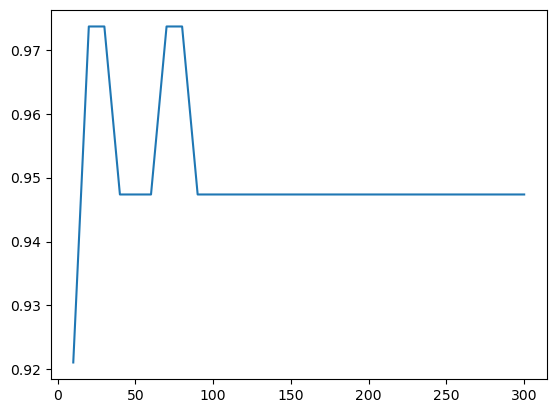

In [193]:
N = 30
accuracy = []

for i in range(N):
    clf = RandomForestClassifier(n_estimators=(i+1)*10)
    clf.fit(X_train, y_train)
    accuracy.append(clf.score(X_test,y_test))
    print((i+1)*10, accuracy[i])

plt.plot([10*(i+1) for i in range(30)], accuracy)
plt.show()

## 2- Construire et visualiser la matrice de confusion pour chacun des modèles (et pour les deux stratégies d’apprentissage) sur l’ensemble de test. Qu’observez-vous ?¶

### 1 - Arbre de decision

Matrice de confusion Arbre de decision :
[[11  0  0]
 [ 0 10  1]
 [ 0  1 15]]


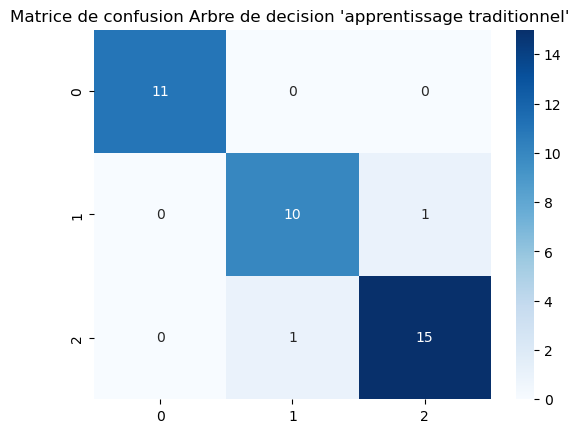

In [180]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# Matrice de confusion Arbre de decision (apprentissage traditionnel)
clf_conf_matrix = confusion_matrix(y_test, clf_pred)
print("Matrice de confusion Arbre de decision :")
print(clf_conf_matrix)
import matplotlib.pyplot as plt
import seaborn as sns

# Matrice de confusion Arbre de decision
sns.heatmap(clf_conf_matrix, annot=True, cmap="Blues")
plt.title("Matrice de confusion Arbre de decision 'apprentissage traditionnel' ")
plt.show()


[[11  0  0]
 [ 0 11  0]
 [ 0  0 16]]


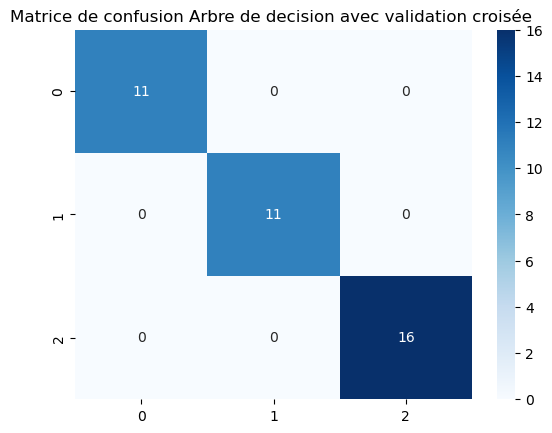

In [181]:
# Faire des prédictions sur les données de test en utilisant la méthode de validation croisée
clf_pred_vc = cross_val_predict(DecisionTreeClassifier(random_state=0), X_test, y_test, cv=5)

# Calculer la matrice de confusion
conf_mat = confusion_matrix(y_test, clf_pred_vc)

# Afficher la matrice de confusion
print(conf_mat)
      
# Matrice de confusion Arbre de decision
sns.heatmap(conf_mat, annot=True, cmap="Blues")
plt.title("Matrice de confusion Arbre de decision avec validation croisée ")
plt.show()

### 2 - foret aleatoire 

Matrice de confusion foret aleatoire :
[[11  0  0]
 [ 0 10  1]
 [ 0  1 15]]


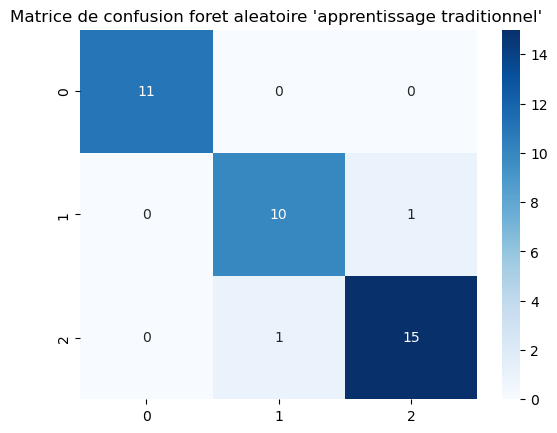

In [182]:
# Matrice de confusion foret aleatoire apprentissage traditionnel
rfc_conf_matrix = confusion_matrix(y_test, rfc_pred)
print("Matrice de confusion foret aleatoire :")
print(rfc_conf_matrix)
# Matrice de confusion foret aleatoire 
sns.heatmap(rfc_conf_matrix, annot=True, cmap="Blues")
plt.title("Matrice de confusion foret aleatoire 'apprentissage traditionnel' ")
plt.show()

[[11  0  0]
 [ 0 11  0]
 [ 0  1 15]]


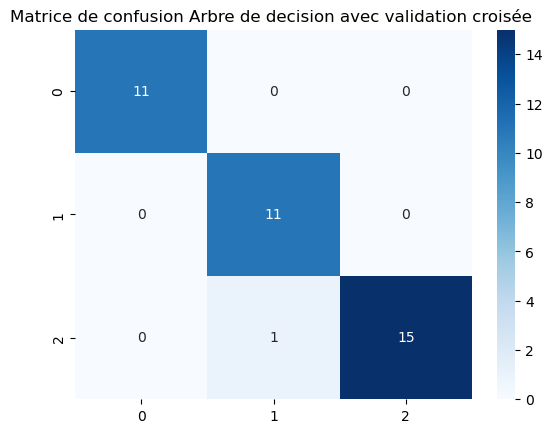

In [183]:
# Faire des prédictions sur les données de test en utilisant la méthode de validation croisée
rfc_pred_vc = cross_val_predict(RandomForestClassifier(),X_test,y_test,cv=10)

# Calculer la matrice de confusion
conf_mat = confusion_matrix(y_test, rfc_pred_vc)

# Afficher la matrice de confusion
print(conf_mat)
      
# Matrice de confusion Arbre de decision
sns.heatmap(conf_mat, annot=True, cmap="Blues")
plt.title("Matrice de confusion Arbre de decision avec validation croisée ")
plt.show()

## 3- Evaluer la performance de l'Arbre de decision et  foret aleatoire, en utilisant les métriques : Rappel, Précision, F-score, et Taux d’erreur 

### 1- Arbre de decision

In [184]:
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score
print(classification_report(y_test, clf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.91      0.91      0.91        11
           2       0.94      0.94      0.94        16

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



In [185]:
# apprentissage traditionnel

rappel_ad = recall_score(y_test, clf_pred, average='macro')
precision_ad = precision_score(y_test, clf_pred, average='macro')
accuracy_ad = accuracy_score(y_test, clf_pred)
print("Le f-score: ",f1_score(y_test,clf_pred, average='macro'))
print("Le rappel: ", rappel_ad)
print("La precison: ", precision_ad)
print("accurancy: ",accuracy_ad)
print("erreur : ",1-accuracy_score(y_test, clf_pred) )

Le f-score:  0.9488636363636364
Le rappel:  0.9488636363636364
La precison:  0.9488636363636364
accurancy:  0.9473684210526315
erreur :  0.052631578947368474


In [186]:
# Avec Validation croisée 
val,val1,val2,val3=[],[],[],[]
for i in range(1,25):
    score_ad_val = cross_val_score(DecisionTreeClassifier(random_state=i),X_test,y_test,cv=5,scoring="accuracy").mean()
    val.append(score_ad_val)

    recall_ad_val=cross_val_score(DecisionTreeClassifier(random_state=i),X_test,y_test,cv=5,scoring="recall_macro").mean()
    val1.append(recall_ad_val)

    precision_ad_val=cross_val_score(DecisionTreeClassifier(random_state=i),X_test,y_test,cv=5,scoring="precision_macro").mean()
    val2.append(precision_ad_val)

    
print("recall score: ",recall_ad_val)
print("precision score:",precision_ad_val)
print("score_knn_val: ", score_ad_val)
print("Error score: ",1-score_ad_val)

recall score:  0.9666666666666668
precision score: 0.9833333333333332
score_knn_val:  0.975
Error score:  0.025000000000000022


### 2- Foret aleatoire

In [187]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.91      0.91      0.91        11
           2       0.94      0.94      0.94        16

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



In [188]:
# apprentissage traditionnel

rappel_rf = recall_score(y_test, rfc_pred, average='macro')
precision_rf = precision_score(y_test, rfc_pred, average='macro')
accuracy_rf = accuracy_score(y_test, rfc_pred)
print("Le f-score: ",f1_score(y_test,rfc_pred, average='macro'))
print("Le rappel: ",rappel_rf)
print("La precison: ",precision_rf)
print("accurancy: ", accuracy_rf)
print("erreur : ",1-accuracy_score(y_test, rfc_pred) )

Le f-score:  0.9488636363636364
Le rappel:  0.9488636363636364
La precison:  0.9488636363636364
accurancy:  0.9473684210526315
erreur :  0.052631578947368474


In [189]:
# Avec Validation croisée 
val,val1,val2,val3=[],[],[],[]
for i in range(1,25):
    score_rf_val = cross_val_score(RandomForestClassifier(n_estimators=(i+1)*10),X_test,y_test,cv=5,scoring="accuracy").mean()
    val.append(score_rf_val)

    recall_rf_val=cross_val_score(RandomForestClassifier(n_estimators=(i+1)*10),X_test,y_test,cv=5,scoring="recall_macro").mean()
    val1.append(recall_rf_val)

    precision_rf_val=cross_val_score(RandomForestClassifier(n_estimators=(i+1)*10),X_test,y_test,cv=5,scoring="precision_macro").mean()
    val2.append(precision_rf_val)

    
print("recall score: ",recall_rf_val)
print("precision score:",precision_rf_val)
print("Accuracy : ", score_rf_val)
print("Error score: ",1-score_rf_val)

recall score:  0.9777777777777779
precision score: 0.9833333333333332
Accuracy :  0.975
Error score:  0.025000000000000022


## 4- Etudiez l’influence du paramètre k sur la performance d' Abbre de decision et foret aleatoire.

Random state = 0: Score = 0.96
Random state = 1: Score = 0.9533333333333334
Random state = 2: Score = 0.96
Random state = 3: Score = 0.96
Random state = 4: Score = 0.96
Random state = 5: Score = 0.96
Random state = 6: Score = 0.9533333333333334
Random state = 7: Score = 0.96
Random state = 8: Score = 0.96
Random state = 9: Score = 0.9533333333333334


Text(0, 0.5, 'testing accuracy')

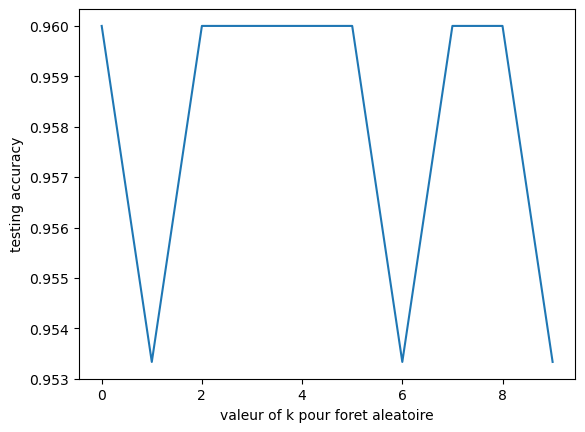

In [194]:
# Initialisez une liste pour stocker les scores de validation croisée
scores = []
k_values = range(0, 10)
# Essayez différentes valeurs de random_state et calculez la précision pour chaque modèle
for random_state in range(10):
    clf = DecisionTreeClassifier(random_state=random_state)
    score = np.mean(cross_val_score(clf, X, y, cv=10))
    scores.append(score)

# Affichez les scores de validation croisée pour chaque valeur de random_state
for i, score in enumerate(scores):
    print("Random state = {}: Score = {}".format(i, score))
    
plt.plot(k_values,scores)
plt.xlabel("valeur of k pour foret aleatoire")
plt.ylabel("testing accuracy")

n_estimators = 10: Score = 0.96
n_estimators = 20: Score = 0.9666666666666666
n_estimators = 30: Score = 0.9666666666666666
n_estimators = 40: Score = 0.96
n_estimators = 50: Score = 0.96
n_estimators = 60: Score = 0.96
n_estimators = 70: Score = 0.96
n_estimators = 80: Score = 0.96
n_estimators = 90: Score = 0.96
n_estimators = 100: Score = 0.9666666666666666


Text(0, 0.5, 'testing accuracy')

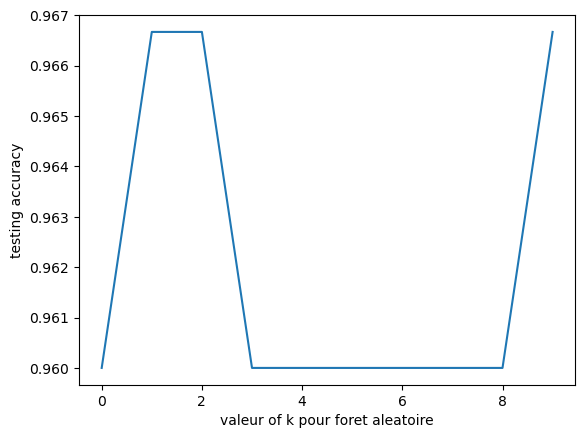

In [195]:
# Initialisez une liste pour stocker les scores de validation croisée
scores = []

# Essayez différentes valeurs de n_estimators et calculez la précision pour chaque modèle
for n_estimators in range(10, 101, 10):
    clf = RandomForestClassifier(n_estimators=n_estimators)
    score = np.mean(cross_val_score(clf, X, y, cv=10))
    scores.append(score)

# Affichez les scores de validation croisée pour chaque valeur de n_estimators
for i, score in enumerate(scores):
    print("n_estimators = {}: Score = {}".format((i+1)*10, score))

    
plt.plot(k_values,scores)
plt.xlabel("valeur of k pour foret aleatoire")
plt.ylabel("testing accuracy")


## Comparer la performance de Arbre de decision et foret aleatoire, et donner une interprétation des résultats obtenus. 

In [192]:
import pandas as pd
evaluation = {
"AD-traditionnel":{"recall":rappel_ad,"precision":precision_ad,"accuracy":accuracy_ad  , "Erreur": 1 - accuracy_ad },
"AD-validation_croise":{"recall":recall_ad_val,"precision":precision_ad_val,"accuracy":score_ad_val , "Erreur": 1 - score_ad_val},
"RF-traditionnel":{"recall":rappel_rf,"precision":precision_rf,"accuracy":accuracy_rf  , "Erreur": 1 - accuracy_rf },
"RF-validation_croise":{"recall":recall_rf_val,"precision":precision_rf_val,"accuracy":score_rf_val , "Erreur": 1 - score_rf_val }
}

pd.DataFrame.from_dict(evaluation)

,AD-traditionnel,AD-validation_croise,RF-traditionnel,RF-validation_croise
recall,0.948864,0.966667,0.948864,0.977778
precision,0.948864,0.983333,0.948864,0.983333
accuracy,0.947368,0.975000,0.947368,0.975000
Erreur,0.052632,0.025000,0.052632,0.025000
